<a href="https://colab.research.google.com/github/Ashraf-Saleheen/DataScienceProject-2-Titanic/blob/main/TitanicSurvivalPred2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Survival Prediction:




1. Overview
2. Understanding the Shape of Data (Histogram, Boxplot etc.)
3. Data Cleaning
4. Data Exploration
5. Feature Engineering
6. Basic Modeling
7. Model Tuning
8. Ensemble Model Building
9. **Results**


##1. Overview

In this project I shall try to walk through how a Data Scientist walk through a given problem. My goal would be to predict the number of survivor and deaths in the Titanic Shipwreck. We shall use deeplearning techniques to analyze and come up with a desired outcome.

###Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Project Planning

a) Understanding the nature of the data using .info(), .describe()
b) Histograms & Boxplots
c) Value Counts
d) Missing Data
e) Corelation between the metrics
f) Exploring Interesting Facts
  - Wealthy Survive
  - By Location
  - Age Scatterplot with Ticket Price
  - Young and Wealthy Variable
   - Total Spent
g) Feature Engineering
h) Preprocess data together or Use a transformer
  -Use label for train and test
i) Scaling
j) Model Baseline
k) Model comparison with CV


### Loading Dataset

We shall exclusively work with training dataset and try to validate data from the training dataset. We shall wrok with the test data set for the final prediction.

In [3]:
training = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")


In [4]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### Light Data exploration

  -For Neumeric Data
    -Making Histogram
    -Corrplot
    -Pivot Table to understand relationship with survival
  -For Categorical Data
    - Bar charts to understand balance of classes
    - Pivot Table to understand relationship with survival

In [5]:
## Quck look at our data types and null count
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
## To further clarify we want to use .describe method. It will give us an
## undestadning of the central tendencies of the data

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
# We shall now separate the neumeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [8]:
# We shall look at the nemerical values and the categorical values separately
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]



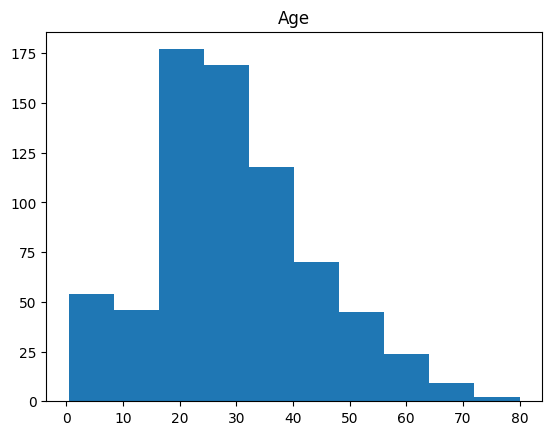

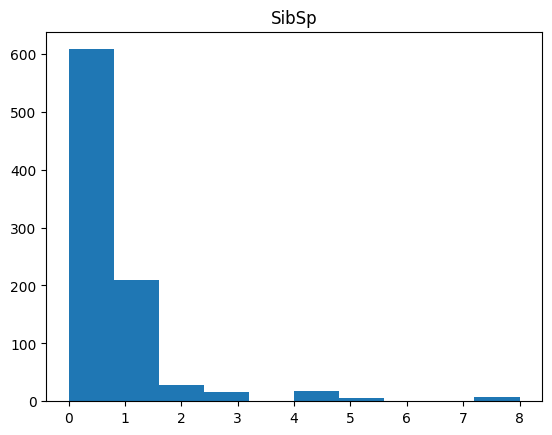

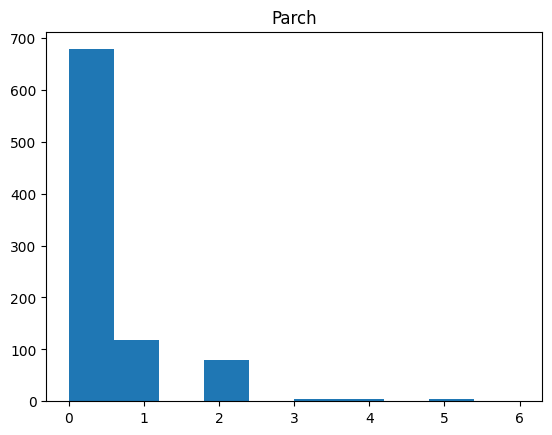

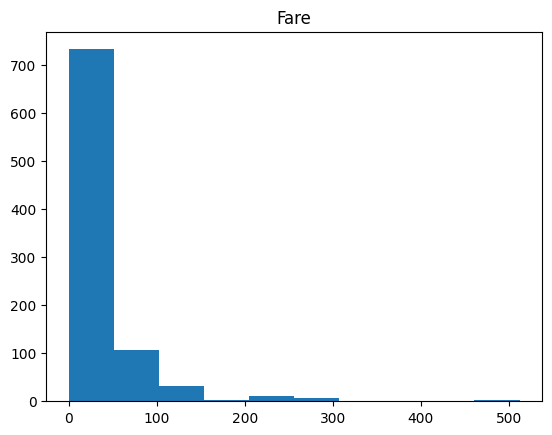

In [9]:
## Distribution for all neumeric varibles

for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

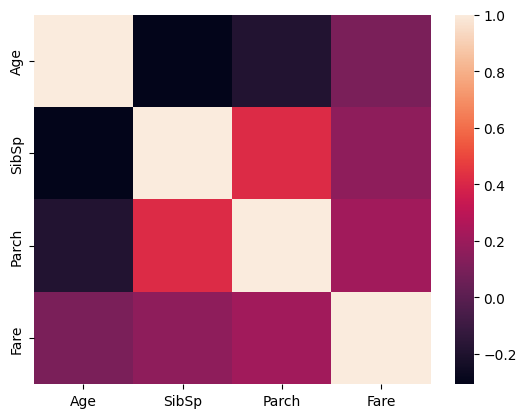

In [10]:
# To normalize the data
print(df_num.corr())
sns.heatmap(df_num.corr())

In [11]:
# Compare Survival rate accross Age, SibSp, Fare, Parch

pd.pivot_table(training, index='Survived', values=['Age', 'Fare', 'Parch', 'SibSp'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


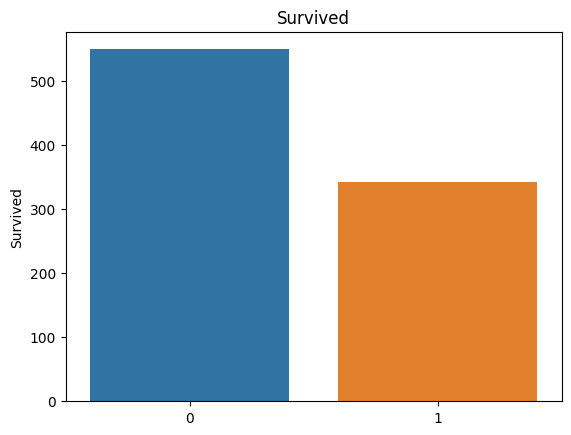

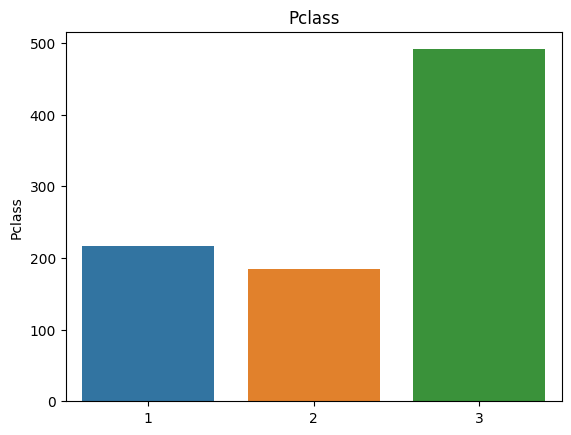

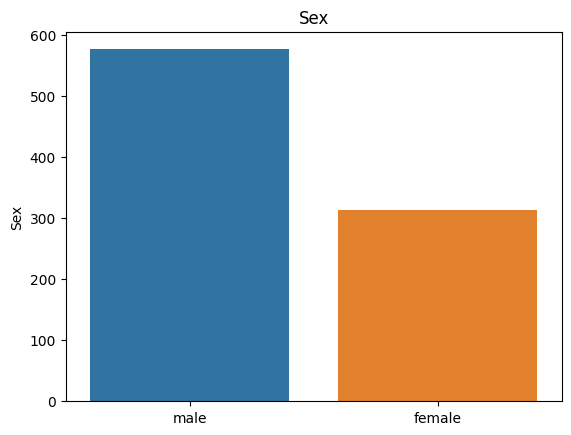

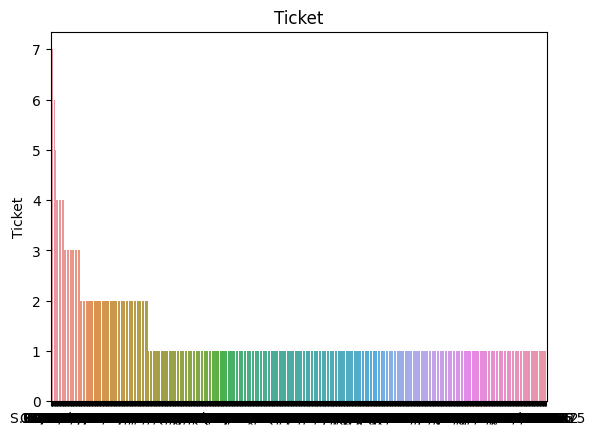

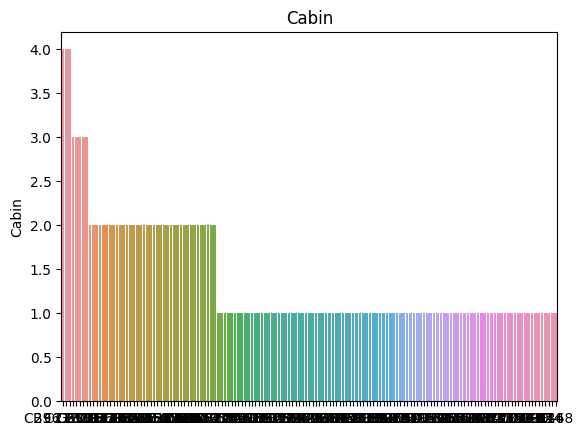

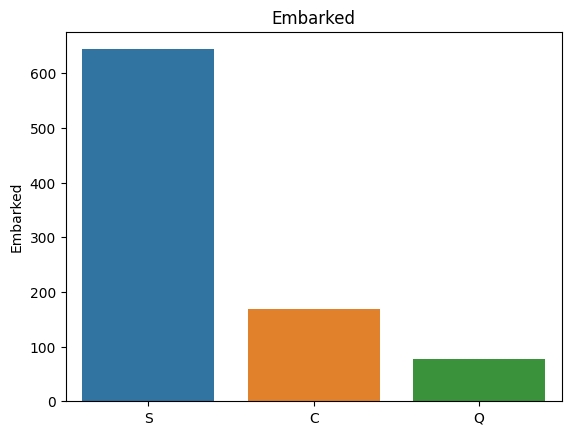

In [12]:
for i in df_cat.columns:
  sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
  plt.title(i)
  plt.show()

In [13]:
# Comparing Survival and all the categorical variables

print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



## Feature Engineering

1. Cabin = Simply cabins(evaluated if cabin letter (cabin_adv) or the purchase against tickets accross multiple cabin (cabin_multiple) impacted survival

2. Tickets = Did ticket type impacted survival ?

3. Did a person's title relate to survival rate?

In [14]:
df_cat.Cabin
training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x))

# We may wish to check cabin by letter or number, to understand we shall create some categories of letters and multiple letters

# Sort the series by index and display it sequentially
sorted_output = training['cabin_multiple'].value_counts().sort_index()
print(sorted_output)
# training['cabin_multiple'].value_counts()



0     687
1       4
2      24
3     128
4      24
5       4
7      12
11      6
15      2
Name: cabin_multiple, dtype: int64


In [15]:
  pd.pivot_table(training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4,5,7,11,15
Survived,,,,,,,,,
0,481.0,2.0,7.0,41.0,8.0,3.0,4.0,3.0,NaN
1,206.0,2.0,17.0,87.0,16.0,1.0,8.0,3.0,2.0


In [16]:
# Creating categories based on cabin letters (n stands for null)
# We shall treat null values as its own category

training['cabin_adv'] = training.Cabin.apply(lambda x:str(x)[0])


In [17]:
# Comparing survival rate by cabin

print(training.cabin_adv.value_counts())
pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
# Understanding ticket values better
# neumeric vs Non Neumeric

training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training['Ticket'].apply(
    lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else '0'
)



In [19]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [20]:
# We shall view all rows for better understanding

column_name = 'ticket_letters'

# Extract and clean ticket letters
training['ticket_letter'] = training['Ticket'].apply(
    lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else '0'
)

# Display a portion of the rows
pd.set_option('display.max_rows', 10)  # Set the number of rows you want to display
print(training[column_name].value_counts())


0          665
pc          60
ca          41
a5          21
stono2      18
          ... 
scow         1
fa           1
sop          1
sca4         1
casoton      1
Name: ticket_letters, Length: 29, dtype: int64


In [21]:
# difference between numeric and non numeric tickets in survival rate

pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Name', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
# Survival rate accross different ticket types as per data

pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Name', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [23]:
# feature engineering on peron's title

training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) # removing the mr., mrs., master. Etc



In [24]:
training['name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
           ... 
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: name_title, Length: 17, dtype: int64

##Data Preprocessing for Model

1. Drop all null values
2. We shall include only relevant variables and remove other variables for better modeling
3. Transform all categorical data.
4. We shall impute data with mean and median for 'fare' and 'age'
5. We shall normalize 'fare' using logarithm to provide more sembalnce of a normal distribution
6. We shall scale data frm 0 to 1 with standar scaler

(889,)

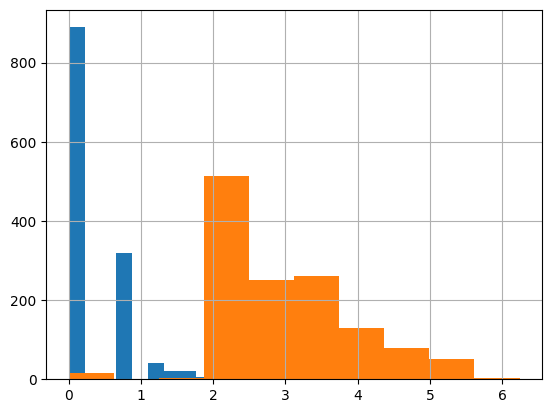

In [25]:
# Now we shall crate all categorical variables that was done above for both training and test set

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x:str(x)[0])

all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data['Ticket'].apply(
    lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else '0'
)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# No impute nulls for continuous data

all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())

# Now drop from 'Embarked' rows
all_data.dropna(subset=['Embarked'],inplace=True)

all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# Log norm of Fare data

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converting Fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#creating dummy variable for categories

all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare', 'Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

# Splitting train and test data

x_train = all_dummies[all_dummies.train_test ==1].drop(['train_test'],axis=1)
x_test = all_dummies[all_dummies.train_test ==0].drop(['train_test'],axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape



In [26]:
import sklearn

In [27]:
# Now scaling data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

all_dummies_scaled= all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)

y_train = all_data[all_data.train_test==1].Survived


# Model Building

We should test how different model reacts to different parameters. We shall use a 5 fold cross validation to get a baseline. When we get the baseline, we shall be able to observe how tuning improves with each model. We shall see that high baseline will not result in high accuracy in test set.

1. Naieve Bayes(72.21%)
2. Logistic Regression(82.11%)
3. Decision Tree(77.61%)
4. K Nearest Neighbour (81.44%)
5. Random Forest (80.76%)
6. Support Vector Classifier (82.79%)
7. Xtreem Gradient Boosting (82.22%)
8. Soft Voting Classifier - All Models()


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
# Using Naieve Bayes as our baseline of classification

gnb =GaussianNB()
cv = cross_val_score(gnb, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66292135 0.71348315 0.75842697 0.74719101 0.72881356]
0.7221672062464293


In [30]:
# Logistic Regression

lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.84745763]
0.8211769186821558


In [31]:
# Decision Tree

dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.73595506 0.83146067 0.75280899 0.80225989]
0.7761823144797816


In [32]:
# K Nearest Neighbor

k = KNeighborsClassifier()
cv = cross_val_score(k, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.78089888 0.8258427  0.82022472 0.85310734]
0.8144416936456548


In [33]:
# Random Forest Calssifier

rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.84831461 0.74157303 0.84180791]
0.8076874246175331


In [34]:
# Support Vector Classifier

svc = SVC(probability = True)
cv = cross_val_score(svc, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.81460674 0.83146067 0.80337079 0.85310734]
0.8279248397130706


In [35]:
# Xtreem Gradient Boosting
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80337079 0.85393258 0.79775281 0.83615819]
0.82228781819336


Voting classifier takes all of the inputs and the averages the found results. Each classifier gets one vote 'Yes' or 'No' and finds the most popular one. We need an odd number to decide.

The soft classifier averages the confidence of each model. If it finds the average confidence to greater than 50%, it will consider it as 1 vote.  

In [36]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr',lr),('gnb',gnb),('dt',dt),('k',k),('rf',rf),('svc',svc),('xgb',xgb)], voting='soft')

In [37]:
cv = cross_val_score(voting_clf, x_train_scaled,y_train, cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.82022472 0.8258427  0.79213483 0.85310734]
0.8211832666793626


In [38]:
voting_clf.fit(x_train_scaled, y_train)
y_hat_base_vc = voting_clf.predict(x_test_scaled)
basic_submission= {'PassengerId':test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data= basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

## Model Tuned Performance ***


1. Naieve Bayes(72.21%) After Tuning ()
2. Logistic Regression(82.11%) After Tuning (82.56%)
3. Decision Tree(77.61%) After Tuning ()
4. K Nearest Neighbour (81.44%) After Tuning (82.34%)
5. Random Forest (80.76%) After Tuning (83.69%)
6. Support Vector Classifier (82.79%) After Tuning (82.79%)
7. Xtreem Gradient Boosting (82.22%) After Tuning (85.15%)
8. Soft Voting Classifier - All Models()


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Simple performance reporting function presented
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))



In [41]:
lr = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_iter': [2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create the GridSearchCV instance
clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to your data
best_clf_lr = clf_lr.fit(x_train_scaled, y_train)

# Perform a function 'clf_performance' with the best model
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8256903446962482
Best Parameters: {'C': 545.5594781168514, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [42]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9],
              'weights':['uniform', 'distance'],
              'algorithm': ['auto','ball_tree', 'kd_tree'],
              }
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the K Nearet Neighbor to your data
best_clf_knn = clf_knn.fit(x_train_scaled, y_train)

# Perform a function 'clf_performance' with the best model
clf_performance(best_clf_knn, 'K Nearest Neighbor')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
K Nearest Neighbor
Best Score: 0.823417761696185
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}


In [43]:
svc = SVC(probability=True)

# Define the parameter grid for hyperparameter tuning
param_grid = [
    {'kernel': ['rbf'],
     'gamma': [.1, .5, 1, 2, 5, 10],
     'C': [.1, 1, 10, 100, 1000]},

    {'kernel': ['linear'],
     'C': [.1, 1, 10, 100, 1000]},

    {'kernel': ['poly'],
     'degree': [2, 3, 4, 5],
     'C': [.1, 1, 10, 100, 1000]}
]

# Create the GridSearchCV instance
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to your data
best_clf_svc = clf_svc.fit(x_train_scaled, y_train)

# Perform a function 'clf_performance' with the best model
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8279248397130706
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [44]:

# Create the Random Forest Classifier instance
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomizedSearchCV instance
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, n_iter=100, verbose=True, n_jobs=-1)

# Fit the Random Forest Classifier to your data
best_clf_rf_rnd = clf_rf_rnd.fit(x_train_scaled, y_train)

# Perform a function 'clf_performance' with the best model
clf_performance(best_clf_rf_rnd, 'Random Forest Classifier: ')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest Classifier: 
Best Score: 0.8346791087411922
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [45]:

# Create the Random Forest Classifier instance
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [400, 450, 500,550],
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [15,20,25],
    'max_features': ['auto', 'sqrt',10],
    'min_samples_leaf': [2,3],
    'min_samples_split': [2,3]
}

# Create the RandomizedSearchCV instance
clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the Random Forest Classifier to your data
best_clf_rf = clf_rf.fit(x_train_scaled, y_train)

# Perform a function 'clf_performance' with the best model
clf_performance(best_clf_rf, 'Random Forest: ')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest: 
Best Score: 0.8335491652383673
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


<Axes: >

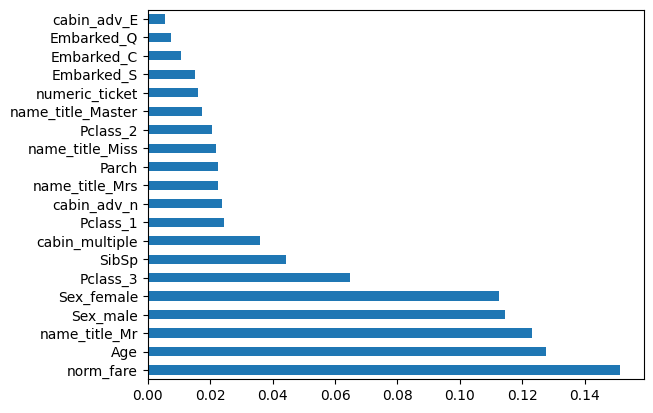

In [47]:
best_rf = best_clf_rf.best_estimator_  # Note the underscore after 'best_estimator'
best_rf.fit(x_train_scaled, y_train)

feat_importances = pd.Series(best_rf.feature_importances_, index=x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [48]:
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [450, 500,550],
    'colsample_bytree':[0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha':[1],
    'reg_lambda': [2,5,10],
    'subsample':[0.55,0.6,0.65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method':['uniform']

}
clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_xgb = clf_xgb.fit(x_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB: ')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB: 
Best Score: 0.8515393893226687
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.55}


In [57]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(x_test_scaled)
xgb_submission = {'PassengerId':test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)



## Model Additional Ensemble Approaches

1. Expremented with hard voting classifier of three estimators (KNN,SVM,RF)
2. Expremented with soft voting classifier of three estimators (KNN,SVM,RF)
3. Expremented with soft voting of all estimator performing better than 80%
4. Expremented with soft voting on all estimators except XGB

In [61]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_
best_svc = best_clf_svc.best_estimator_

# Define Voting Classifier models
voting_clf_hard = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting='soft')
voting_clf_all = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting='soft')
voting_clf_xgb = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('xgb', best_xgb)], voting='soft')

# Assuming you have defined cross_val_score and imported necessary libraries

# Evaluate ensemble models using cross-validation
print('Voting_clf_hard:', cross_val_score(voting_clf_hard, x_train_scaled, y_train, cv=5))
print('Voting_clf_hard mean:', cross_val_score(voting_clf_hard, x_train_scaled, y_train, cv=5).mean())

print('Voting_clf_soft:', cross_val_score(voting_clf_soft, x_train_scaled, y_train, cv=5))
print('Voting_clf_soft mean:', cross_val_score(voting_clf_soft, x_train_scaled, y_train, cv=5).mean())

print('Voting_clf_all:', cross_val_score(voting_clf_all, x_train_scaled, y_train, cv=5))
print('Voting_clf_all mean:', cross_val_score(voting_clf_all, x_train_scaled, y_train, cv=5).mean())

print('Voting_clf_xgb:', cross_val_score(voting_clf_xgb, x_train_scaled, y_train, cv=5))
print('Voting_clf_xgb mean:', cross_val_score(voting_clf_xgb, x_train_scaled, y_train, cv=5).mean())


Voting_clf_hard: [0.8258427  0.80337079 0.84269663 0.80898876 0.85875706]
Voting_clf_hard mean: 0.8279311877102774
Voting_clf_soft: [0.82022472 0.82022472 0.83707865 0.80898876 0.85875706]
Voting_clf_soft mean: 0.8301783787215135
Voting_clf_all: [0.81460674 0.82022472 0.83707865 0.79775281 0.85875706]
Voting_clf_all mean: 0.8268075922046594
Voting_clf_xgb: [0.84269663 0.8258427  0.84269663 0.81460674 0.8700565 ]
Voting_clf_xgb mean: 0.8391798387608709


In [64]:
best_rf.fit(x_train_scaled, y_train)

# Fit the ensemble models first
voting_clf_hard.fit(x_train_scaled, y_train)
voting_clf_soft.fit(x_train_scaled, y_train)
voting_clf_all.fit(x_train_scaled, y_train)
voting_clf_xgb.fit(x_train_scaled, y_train)

# Now you can make predictions using the fitted models
y_hat_vc_hard = voting_clf_hard.predict(x_test_scaled)
y_hat_rf = best_rf.predict(x_test_scaled)
y_hat_vc_soft = voting_clf_soft.predict(x_test_scaled)
y_hat_vc_all = voting_clf_all.predict(x_test_scaled)
y_hat_vc_xgb = voting_clf_xgb.predict(x_test_scaled)



In [66]:

# Convert output to data frame

final_data = {'PassengerId': test['PassengerId'], 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test['PassengerId'], 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test['PassengerId'], 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test['PassengerId'], 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test['PassengerId'], 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test['PassengerId'],
                   'Survived_vc_hard': y_hat_vc_hard,
                   'Survived_vc_soft': y_hat_vc_soft,
                   'Survived_vc_rf': y_hat_rf,
                   'Survived_vc_all': y_hat_vc_all,
                   'Survived_vc_xgb': y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)


In [69]:

# Track difference between output
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: np.where(x.Survived_vc_hard != y_hat_rf, 1, 0), axis=1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: np.where(x.Survived_vc_hard != y_hat_vc_soft, 1, 0), axis=1)
comparison['difference_hard_all'] = comparison.apply(lambda x: np.where(x.Survived_vc_all != y_hat_vc_hard, 1, 0), axis=1)

In [75]:
comparison.difference_hard_all.value_counts()




[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...]    1
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...]    1
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...]    1
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 

In [ ]:
#prepare submission files

submission.to_csv(submission_rf.csv, index=False)
submission_2.to_csv(submission_vc_hard.csv, index=False)
submission_3.to_csv(submission_vc_soft.csv, index=False)
submission_4.to_csv(submission_vc_all.csv, index=False)
submission_5.to_csv(submission_vc_xgb2.csv, index=False)